https://archive.ics.uci.edu/ml/datasets/Roman+Urdu+Data+Set

Loading libraries 

In [ ]:
import numpy as np
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [ ]:
# Load dataset
def load_data(DATA_PATH):
    ''' Input parameter: 
    DATA_PATH = text to directory path 
    this method loads the dataset'''
    data = pd.read_csv(DATA_PATH, header=None)
    return data
    #sample_data/Roman Urdu DataSet.csv

In [ ]:
DATA_PATH = 'Roman Urdu DataSet.csv'
roman_urdu_df = load_data(DATA_PATH) #loading the data
roman_urdu_df.head()


,0,1,2
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,NaN
1,sahi bt h,Positive,NaN
2,"Kya bt hai,",Positive,NaN
3,Wah je wah,Positive,NaN
4,Are wha kaya bat hai,Positive,NaN


The dataset shows three columns, the first column is all the sentences on which data analysis would be done. The second column shows the type of the sentence is like Positive, Negative or Neutral. The last column would be removed as its of no objective

**Data Cleaning for better quality**

Dropping empty column

In [ ]:
roman_urdu_df = roman_urdu_df.drop([2], axis=1) #droping column

In [ ]:
roman_urdu_df.columns = ['Sentence', 'Response'] #adding cols names to data

In [ ]:
roman_urdu_df.head()

,Sentence,Response
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive
3,Wah je wah,Positive
4,Are wha kaya bat hai,Positive


Checking for Null values:

In [ ]:
roman_urdu_df.isnull().sum()

Sentence    1
Response    0
dtype: int64

Dropping all null values:

In [ ]:
roman_urdu_df.dropna(inplace = True)

In [ ]:
roman_urdu_df.isnull().sum()

Sentence    0
Response    0
dtype: int64

counting response on each sentence.

In [ ]:
roman_urdu_df['Response'].value_counts()

Neutral     8928
Positive    6013
Negative    5286
Neative        1
Name: Response, dtype: int64

In [ ]:
# we can see there is one neative response
# digging inside it
roman_urdu_df[roman_urdu_df['Response'] == 'Neative']

,Sentence,Response
13277,product achi hai but wrong waist size send kar...,Neative


We can examine that there are 8929 values of Neutral types, 6013 of Positive types while 5286 from Neagtive type and 1 from a type name Neative. There is no type as neative as from the data description. So we can say that its a spell check error.  

Fixing wrong class assignment.

In [ ]:
roman_urdu_df.loc[roman_urdu_df['Response']=='Neative', 'Response'] = 'Negative'

In [ ]:
roman_urdu_df['Response'].value_counts()

Neutral     8928
Positive    6013
Negative    5287
Name: Response, dtype: int64

Total count per sentiment.

# Visualization
@Author: Rauff

**ExPloratoray Anlysis on dataset before doing normalization**

In [ ]:
positive = roman_urdu_df[roman_urdu_df['Response'] == 'Positive'].shape[0]
Negative = roman_urdu_df[roman_urdu_df['Response'] == 'Negative'].shape[0]
Neutral =  roman_urdu_df[roman_urdu_df['Response'] == 'Neutral'].shape[0]

The data set has two main columns, one with the sentences while other with the responses, the sentence column shows the social media/text messgaes while the response column shows the three types of catories

Poistive
Negative
Netural
From the bar plot below we can see that the neutral results are the highest while following the positive results and negtive reults being the lowest.

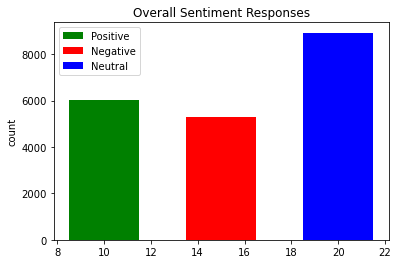

In [ ]:
# bar plot of the 3 classes
plt.bar(10,positive,3, label="Positive",color=['green'])
plt.bar(15,Negative,3, label="Negative",color=['red'])
plt.bar(20,Neutral,3, label="Neutral",color=['blue'])
plt.legend()
plt.ylabel('count')
plt.title('Overall Sentiment Responses')
plt.show()

Count number of words for each sentence.

In [ ]:
roman_urdu_df['len'] = roman_urdu_df['Sentence'].str.rsplit().str.len()

Display average number of words per sentiment

<AxesSubplot:title={'center':'Average number of words per sentiment'}, xlabel='Sentiment'>

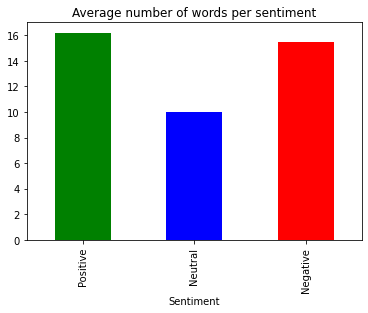

In [ ]:
roman_urdu_df.groupby(['Response'], sort=False)['len'].mean().plot(kind='bar',title = "Average number of words per sentiment", xlabel="Sentiment",color=['g', 'b', 'r'])

Display maximum number of words per sentiment

<AxesSubplot:title={'center':'Maximum number of words per sentiment'}, xlabel='Sentiment'>

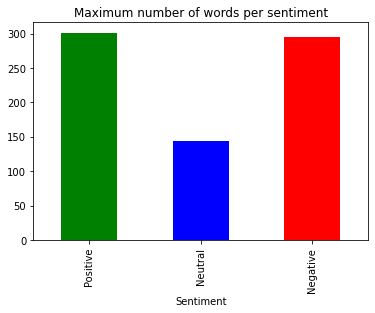

In [ ]:
roman_urdu_df.groupby(['Response'], sort=False)['len'].max().plot(kind='bar',title = "Maximum number of words per sentiment", xlabel="Sentiment",color=['g', 'b', 'r'])

Word cloud on original dataset.

In [ ]:
text_l = roman_urdu_df['Sentence'].tolist()

In [ ]:
text = " ".join(review for review in text_l)

In [ ]:
wordcloud = WordCloud().generate(text)

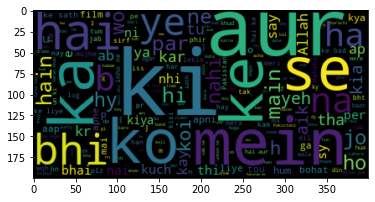

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')

**Overall Data Statistics**

In [ ]:
print('Dataset size:',roman_urdu_df.shape)
print('Columns are:',roman_urdu_df.columns)

Dataset size: (20228, 3)
Columns are: Index(['Sentence', 'Response', 'len'], dtype='object')


In [ ]:
roman_urdu_df.dtypes

Sentence    object
Response    object
len          int64
dtype: object

###Creating dataframe of Sentence and Response Types


In [ ]:
df  = pd.DataFrame(roman_urdu_df[['Sentence', 'Response']]) #converting into dataframe


**Normalizating Techniques**

##### Removing Punutaions:

In [ ]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

This funcation below removes all the punctuation shown above 

In [ ]:

def remove_punct(text):
    ''' Input parameter:
    text: (str)
    this method is used to take each text line and check the characters if it
    contains any puntuation and then remove them with blank space'''  
    text  = "".join([char for [char] in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text



In [ ]:
# removing all the punctuation
df['Sentence_Removal'] = df['Sentence'].apply(lambda x: remove_punct(str(x))) 


In [ ]:
df.head(5) #testing to view transformed data

,Sentence,Response,Sentence_Removal
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lak...
1,sahi bt h,Positive,sahi bt h
2,"Kya bt hai,",Positive,Kya bt hai
3,Wah je wah,Positive,Wah je wah
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai


Lowercase transformation:

This funcation below transforms all the values to lower case 

In [ ]:
def convert_to_lower_case(text):
    ''' Input parameter:
    text: (str)
    this method is used to take each text line and converts the characters  into lower case and joins them further'''
    text  = "".join([char.lower() for [char] in text if char not in string.punctuation])
    return text



In [ ]:
df['Lower_Case'] = df['Sentence_Removal'].apply(lambda x: convert_to_lower_case(str(x))) #calling lower case on each line


In [ ]:
df.head(5) #testing lower case of alphabet

,Sentence,Response,Sentence_Removal,Lower_Case
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha ya her kisi kay bus ki bat nhi hai lak...
1,sahi bt h,Positive,sahi bt h,sahi bt h
2,"Kya bt hai,",Positive,Kya bt hai,kya bt hai
3,Wah je wah,Positive,Wah je wah,wah je wah
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai,are wha kaya bat hai


We have made multiple columns in the data frame for the preprocessing as we are doing analysis with and without stop words removal, with and without stemming. This is done in order to futher examine the results. Also some of the results were giving no meaning with the results perfomed through stemming. 
1- Lower case - Containing all the sentences with lower case

In [ ]:

new = df['Lower_Case'].str #WITHOUT ANY PRE-PROCESSING CHANGED TO LOWER CASE

##### Stop words removing 

Stop words were were taken intaliay from the world wide wide however while performing clustering we saw additional stop words that were further revisted and removed.
The link for the stopWords:https://github.com/haseebelahi/roman-urdu-stopwords/commit/d91938ddf45aebdceefa03901d50cf04d193d7e2#diff-035e0ea95edf76cb6f050e73d5631b9f5858334d500cda0da554746430368498

In [ ]:
# list of stopWord
stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 
           'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch',
           'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to','is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala',
           'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai',
           'sent', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi',
           'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil',
           'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou','h','je','or','jee','he','in','un','kay','ki','ya','ap','meri','me']

#some words like Mein - Ma - Maa
# after running clusters removed stopped words again

@Author Pinki *Sharma*

In [ ]:
dictStopWords = {} # global variable
forFastTextData = []
def removeStopWordss(text):
    text = re.sub('[^a-zA-Z]',' ',str(text))
    text = text.lower()
    wordList =str(text).split()
    for word in wordList:
        if word in stopwords:
            wordList.remove(word)
            if word not in dictStopWords:
                dictStopWords[word]= 1
            else:
                dictStopWords[word] = dictStopWords[word] + 1
    newSentence = " ".join(wordList)
    forFastTextData.append(newSentence.split())
    return (newSentence)


In [ ]:
df['Sen_Out_StopWord'] = df['Lower_Case'].apply(lambda x: removeStopWordss(x)) # sentence with removed stop words
df.head()

,Sentence,Response,Sentence_Removal,Lower_Case,Sen_Out_StopWord
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha her kisi bus bat nhi lakin ki hal kal ...
1,sahi bt h,Positive,sahi bt h,sahi bt h,sahi bt
2,"Kya bt hai,",Positive,Kya bt hai,kya bt hai,bt
3,Wah je wah,Positive,Wah je wah,wah je wah,wah wah
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai,are wha kaya bat hai,are wha kaya bat


In [ ]:
## checking for most common stopwords from the dictionary
import collections
from collections import Counter
dictGraph = {}
d = Counter(dictStopWords) # creating a counter 
d.most_common(10) 
for k,v in d.most_common(10):
    dictGraph[k] = v
dictGraph

{'ki': 5241,
 'ko': 3334,
 'ka': 3298,
 'hai': 3289,
 'se': 3053,
 'aur': 2621,
 'ne': 1909,
 'hain': 1526,
 'ho': 1499,
 'bhi': 1337}

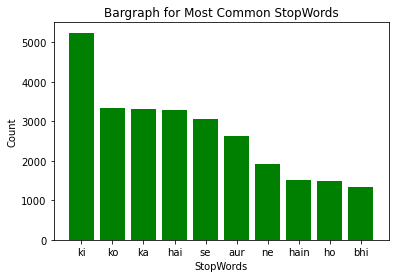

In [ ]:
#plotting a graph of 10 most common stopwords from dictionary
plt.bar(dictGraph.keys(), dictGraph.values(), align='center', color = 'green')
plt.title('Bargraph for Most Common StopWords')
plt.xlabel('StopWords')
plt.ylabel('Count')
plt.show()

We tried plotting all the stop words obtained from the dataset but the graph was bloated .So took the top most 10 stop words obtained from the dataset and plotted the graph. We see from the above graph that "ki","ko" are the most common word used by the user which happens to be a stop word.

In [ ]:
def replacing_characters(word):
    ''' Input Parameter: 
    word: word from the sentences'''
 
    word = re.sub(r'ain$', r'ein', word)
    word = re.sub(r'ai', r'ae', word)
    word = re.sub(r'ay$', r'e', word)
    word = re.sub(r'ey$', r'e', word)
    word = re.sub(r'aa+', r'aa', word)
    word = re.sub(r'e+', r'ee', word)
    word = re.sub(r'ai', r'ahi', word) # e.g "sahi and sai nahi"
    word = re.sub(r'ai', r'ahi', word)
    word = re.sub(r'ie$', r'y', word)
    word = re.sub(r'^es', r'is', word)
    word = re.sub(r'a+', r'a', word)
    word = re.sub(r'j+', r'j', word)
    word = re.sub(r'd+', r'd', word)
    word = re.sub(r'u', r'o', word)
    word = re.sub(r'o+', r'o', word)
    if not re.match(r'ar', word):
        word = re.sub(r'ar', r'r', word)
        word = re.sub(r'iy+', r'i', word)
        word = re.sub(r'ih+', r'eh', word)
        word = re.sub(r's+', r's', word)
    if re.search(r'[rst]y', 'word') and word[-1] != 'y':
        word = re.sub(r'y', r'i', word)
    if re.search(r'[^a]i', word):
        word = re.sub(r'i$', r'y', word)
    if re.search(r'[a-z]h', word):
        word = re.sub(r'h', '', word)
    return word

This method replacing_characters is used for the stemming in order to remove suffix and additional characters for example:
  baat means to talk, while the dataset also contains words like bat, bt in order to explain the same meaning (to talk). Also,
  words like Kaam means to work, while data set  contains words like kam,kaaam km in order to say the same thing. However the reason its not working well in because some word spelling errors are used to explain multple things:
  Kaam(to work) is identified in some sentences as kam or km while in other sentence the word km is also used to identify the word kum

In [ ]:
df['stem'] = df['Sen_Out_StopWord'].apply(lambda x: replacing_characters(x)) #with stop words removed doing stem
df.head()

,Sentence,Response,Sentence_Removal,Lower_Case,Sen_Out_StopWord,stem
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha her kisi bus bat nhi lakin ki hal kal ...,saee ka eer kisi bos bat ni lakin ki al kal bi...
1,sahi bt h,Positive,sahi bt h,sahi bt h,sahi bt,sai bt
2,"Kya bt hai,",Positive,Kya bt hai,kya bt hai,bt,bt
3,Wah je wah,Positive,Wah je wah,wah je wah,wah wah,wa wa
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai,are wha kaya bat hai,are wha kaya bat,aree wa kaya bat




---



In [ ]:
df['Stem_On_Original'] = df['Lower_Case'].apply(lambda x: replacing_characters(x))
df.head()

,Sentence,Response,Sentence_Removal,Lower_Case,Sen_Out_StopWord,stem,Stem_On_Original
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha her kisi bus bat nhi lakin ki hal kal ...,saee ka eer kisi bos bat ni lakin ki al kal bi...,saee ka ya eer kisi kay bos ki bat ni aee laki...
1,sahi bt h,Positive,sahi bt h,sahi bt h,sahi bt,sai bt,sai bt
2,"Kya bt hai,",Positive,Kya bt hai,kya bt hai,bt,bt,kya bt haee
3,Wah je wah,Positive,Wah je wah,wah je wah,wah wah,wa wa,wa jee wa
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai,are wha kaya bat hai,are wha kaya bat,aree wa kaya bat,aree wa kaya bat aee


In [ ]:
df.drop(columns=['Sentence_Removal'])
# Lower_case column is one with removing puntuction and all the unique characters and numeric
# Sen_Out_StopWord column is one with removing stopwords 
# stem cloumn which created after applying stemming function for StopWords
# Stem_On_Original column is one applying stemming function without stopwords

,Sentence,Response,Lower_Case,Sen_Out_StopWord,stem,Stem_On_Original
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha her kisi bus bat nhi lakin ki hal kal ...,saee ka eer kisi bos bat ni lakin ki al kal bi...,saee ka ya eer kisi kay bos ki bat ni aee laki...
1,sahi bt h,Positive,sahi bt h,sahi bt,sai bt,sai bt
2,"Kya bt hai,",Positive,kya bt hai,bt,bt,kya bt haee
3,Wah je wah,Positive,wah je wah,wah wah,wa wa,wa jee wa
4,Are wha kaya bat hai,Positive,are wha kaya bat hai,are wha kaya bat,aree wa kaya bat,aree wa kaya bat aee
...,...,...,...,...,...,...
20224,Hamari jese awam teli laga k mazay leti,Negative,hamari jese awam teli laga k mazay leti,hamari jese awam teli laga k mazay leti,hamri jeesee awam teeli laga k mazay leety,hamri jeesee awam teeli laga k mazay leeti
20225,Kaash hum b parhay likhay hotayKabhi likhtay g...,Negative,kaash hum b parhay likhay hotaykabhi likhtay g...,kaash b parhay likhay hotaykabhi likhtay gulba...,kas b pray likay otaykabi liktay golbadankabi ...,kas om b pray likay otaykabi liktay golbadanka...
20226,Bahi sayasat kufrrr ha saaaf bttttt ha qanon s...,Negative,bahi sayasat kufrrr ha saaaf bttttt ha qanon s...,bahi sayasat kufrrr ha saaaf bttttt ha qanon s...,bai sayasat kofrrr a saf bttttt a qanon sirf a...,bai sayasat kofrrr a saf bttttt a qanon sirf a...
20227,aanti toh gussa e kr gai hain,Negative,aanti toh gussa e kr gai hain,aanti toh gussa e gai,anti to gosa ee gaee,anti to gosa ee kr gaee aeen


**Statistics after cleaning**

In [ ]:

stats = df.drop(labels=["Sentence", "Lower_Case",], axis=1)
stats.describe()

,Response,Sentence_Removal,Sen_Out_StopWord,stem,Stem_On_Original
count,20228,20228,20228,20228,20228
unique,3,19593,19360,19254,19453
top,Neutral,,,,aaa
freq,8928,24,208,210,35




---



@author: Umaima Khurshid Ahmad


We performed  K means clustering on segmented sentimentals, Positive, Negtive and Neutral seprately. We analyzed pretty good results between the clusters. The clustering is perfomed without stemming as it wasnt giving meaningful words in clustering. The main challenage was to identify the K value through the knee elbow plot. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy


Word cloud methods

In [ ]:
def generateWordCloudForClusters(n_clusters,clustermTerms):
    '''Input parameter: n_clusters:
    clustermTerms: dictionary for clustered terms (which has cluster no. and its terms)
    '''
    termListerOfSeprateCluster=[]
    for clusterno in range(n_clusters):
        for i in (clustermTerms):
            if(clusterno == i.get('cluster')): # if same cluster
                terms = i.get('terms')
                termListerOfSeprateCluster.append((terms)) #add to file
        #print(termListerOfSeprateCluster)
        wordcloud = WordCloud(width = 500, height = 500, background_color='black', random_state=10).generate(transformForWordCount(termListerOfSeprateCluster))
        plot_cloud(wordcloud)
        termListerOfSeprateCluster = [] #empty list again for next cluster
    

In [ ]:
def transformForWordCount(terms):
    '''Input parameter: terms(terms per seprate cluster)
    genrates a list for the cloud
    '''
    cloud = []
    for term in range(len(terms)):
        cloud.append(terms[term])
    return " ".join(cloud)

In [ ]:
def plot_cloud(wordcloud):
    '''Input parameter: wordcloud
    plots graph
    '''
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
def plotKneeElbow(matrix,vale_for_range):
    ''' Input patameter: matrix returns a plot to help determine no of clusters'''
    Sum_of_squared_distances = []
    K = range(2,vale_for_range)
    for k in K:
        km = KMeans(n_clusters=k, max_iter=500, n_init=10)
        km = km.fit(matrix)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal clusters')
    plt.show()

**Clustering on dataset as a whole ( without seperating Positive, Negative and Nuetral sentiments)**

In [ ]:
wholedf = df

In [ ]:
# vectorization of the texts
vectorizer = TfidfVectorizer()



In [ ]:
def vectorFeatures(dataSet):
    ''' Input parameter: dataSet: seprate dataset for Positive,Negative or Neutral.
    returns feature names and transformed vector'''
    matrixForm = vectorizer.fit_transform(dataSet['Sen_Out_StopWord'])
# used words (axis in our multi-dimensional space)
    words = vectorizer.get_feature_names()
    #print("words", words)
    return matrixForm,words

In [ ]:
def performKmeansClustering(n_clusters,max_iter,matrixForm):
    ''' Input Parameter: n_clusters: no of clusters
    max_iter: maxium iteratios for each cluster
    matrixForm: vectorized transformed matrix'''

    modelKmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, verbose=1)
    modelKmeans.fit(matrixForm)
    return modelKmeans
    

In [ ]:
matrixdfForm,words = vectorFeatures(wholedf)



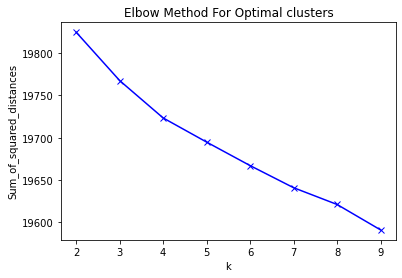

In [ ]:
plotKneeElbow(matrixdfForm,10)

In [ ]:
modelKmeans = performKmeansClustering(5,500,matrixdfForm)


Initialization complete
Iteration 0, inertia 39464.91952387971
Iteration 1, inertia 19736.529300699673
Iteration 2, inertia 19699.614332907473
Iteration 3, inertia 19695.581065485247
Iteration 4, inertia 19694.93685748799
Iteration 5, inertia 19694.758586128377
Iteration 6, inertia 19694.692723584663
Iteration 7, inertia 19694.667489350337
Iteration 8, inertia 19694.65644209507
Iteration 9, inertia 19694.65299893773
Iteration 10, inertia 19694.652457123768
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 39133.35807931186
Iteration 1, inertia 19751.034792292696
Iteration 2, inertia 19743.273824804633
Iteration 3, inertia 19741.739038349013
Iteration 4, inertia 19740.282680556782
Iteration 5, inertia 19738.721435872205
Iteration 6, inertia 19737.992955016143
Iteration 7, inertia 19736.964608624014
Iteration 8, inertia 19736.4438698105
Iteration 9, inertia 19736.406865964924
Iteration 10, inertia 19736.38470255855
Iteration 11, inertia 19736.369

Iteration 39, inertia 19717.06843745714
Iteration 40, inertia 19717.05589911266
Iteration 41, inertia 19717.031655943738
Iteration 42, inertia 19717.014634806448
Iteration 43, inertia 19717.008962254138
Converged at iteration 43: strict convergence.


In [ ]:
labels = modelKmeans.labels_
# indices of preferible words in each cluster
ordered_words = modelKmeans.cluster_centers_.argsort()[:, ::-1]

print("centers:", modelKmeans.cluster_centers_)
print("labels", labels)
print("intertia:", modelKmeans.inertia_)

centers: [[2.45891398e-03 6.07174473e-05 9.70392545e-05 ... 2.40227532e-04
  1.04988722e-05 0.00000000e+00]
 [1.37775121e-03 0.00000000e+00 0.00000000e+00 ... 4.03382411e-04
  0.00000000e+00 0.00000000e+00]
 [2.41059223e-03 0.00000000e+00 0.00000000e+00 ... 9.81660073e-04
  0.00000000e+00 0.00000000e+00]
 [1.82024620e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.13858812e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.78381469e-04]]
labels [0 0 0 ... 0 0 0]
intertia: 19694.652457123768


In [ ]:
n_clusters = 5
texts_per_cluster = numpy.zeros(n_clusters)
for i_cluster in range(n_clusters):
    for label in labels:
        if label==i_cluster:
            texts_per_cluster[i_cluster] +=1

In [ ]:
clusterDictionary={}
clustermTerms=[]
print("Top words per cluster:")
for i_cluster in range(n_clusters):
    print("Cluster:", i_cluster, "texts:", int(texts_per_cluster[i_cluster])),
    for term in ordered_words[i_cluster, :10]:
        clusterDictionary = {"cluster" : i_cluster,"terms" : words[term]}
        clustermTerms.append(clusterDictionary)
        print("\t"+words[term])

Top words per cluster:
Cluster: 0 texts: 14392
	ha
	kia
	nahi
	ni
	hahaha
	bhai
	bht
	good
	nhi
	hai
Cluster: 1 texts: 850
	allah
	ameen
	pak
	salamat
	ata
	masha
	ko
	rakhy
	farma
	dy
Cluster: 2 texts: 826
	ye
	ha
	kia
	nahi
	hai
	ke
	bhai
	kon
	he
	baat
Cluster: 3 texts: 2112
	ke
	mein
	aik
	sath
	the
	kiya
	nahi
	bad
	khan
	leye
Cluster: 4 texts: 2048
	mein
	ke
	aik
	kiya
	pakistan
	khan
	hasil
	aur
	ki
	jis


While examining the Clustering as a whole - without seprating sentiments, we have exmaine that cluster 1 and 4 had majority positive words like praying, salamat (living for longer), Allah(God) etc. While other clusters were neutral words.

**Clustering for positive response**

In [ ]:
n_clusters = 5

In [ ]:
positivedf = df[df['Response'] == 'Positive'] #segmenting positive clusters


In [ ]:
matrixForm,words = vectorFeatures(positivedf)

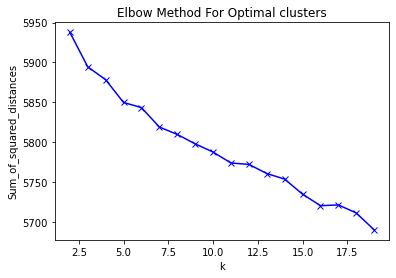

In [ ]:
plotKneeElbow(matrixForm,20)

In [ ]:
modelKmeans = performKmeansClustering(5,500,matrixForm)


Initialization complete
Iteration 0, inertia 11638.70242586698
Iteration 1, inertia 5918.231765076469
Iteration 2, inertia 5912.779323247318
Iteration 3, inertia 5909.458164931391
Iteration 4, inertia 5905.209134354751
Iteration 5, inertia 5898.485345650065
Iteration 6, inertia 5893.752087178129
Iteration 7, inertia 5889.890504252205
Iteration 8, inertia 5887.045430832817
Iteration 9, inertia 5886.080601435889
Iteration 10, inertia 5885.48015143132
Iteration 11, inertia 5885.433516343923
Iteration 12, inertia 5885.428245417689
Iteration 13, inertia 5885.424211706235
Iteration 14, inertia 5885.418479233584
Iteration 15, inertia 5885.417424161298
Iteration 16, inertia 5885.416178679513
Iteration 17, inertia 5885.414037916491
Iteration 18, inertia 5885.4118669801965
Iteration 19, inertia 5885.409829680953
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 11734.932091062374
Iteration 1, inertia 5921.481987676169
Iteration 2, inertia 5915.3095873108

In [ ]:

labels = modelKmeans.labels_
# indices of preferible words in each cluster
ordered_words = modelKmeans.cluster_centers_.argsort()[:, ::-1]

print("Positive centers:", modelKmeans.cluster_centers_)
print("Positive labels", labels)
print("Positive intertia:", modelKmeans.inertia_)

Positive centers: [[0.00429722 0.00011493 0.00016658 ... 0.00112581 0.00041271 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00101542 0.         0.         ... 0.0006425  0.         0.00041574]
 [0.00169045 0.         0.         ... 0.00111931 0.         0.        ]
 [0.00163406 0.         0.         ... 0.00018646 0.         0.        ]]
Positive labels [0 0 0 ... 0 0 0]
Positive intertia: 5850.046389102763


In [ ]:
n_clusters = 5
texts_per_cluster = numpy.zeros(n_clusters)
for i_cluster in range(n_clusters):
    for label in labels:
        if label==i_cluster:
            texts_per_cluster[i_cluster] +=1

In [ ]:
clusterDictionary={}
clustermTerms=[]
print("Top words per Positive cluster:")
for i_cluster in range(n_clusters):
    print("Cluster:", i_cluster, "texts:", int(texts_per_cluster[i_cluster])),
    for term in ordered_words[i_cluster, :10]:
        clusterDictionary = {"cluster" : i_cluster,"terms" : words[term]}
        clustermTerms.append(clusterDictionary)
        print("\t"+words[term])

Top words per Positive cluster:
Cluster: 0 texts: 3593
	ha
	bht
	dua
	achi
	ye
	bohat
	love
	mubarak
	eid
	bhai
Cluster: 1 texts: 86
	good
	very
	qalandars
	lahore
	one
	news
	job
	man
	love
	team
Cluster: 2 texts: 839
	mein
	ke
	pakistan
	khan
	aik
	kiya
	hasil
	ki
	aur
	jis
Cluster: 3 texts: 595
	allah
	ameen
	pak
	salamat
	ata
	ko
	rakhy
	madad
	farma
	lambi
Cluster: 4 texts: 900
	ke
	mein
	sath
	aik
	the
	nahi
	kiya
	film
	leye
	apne


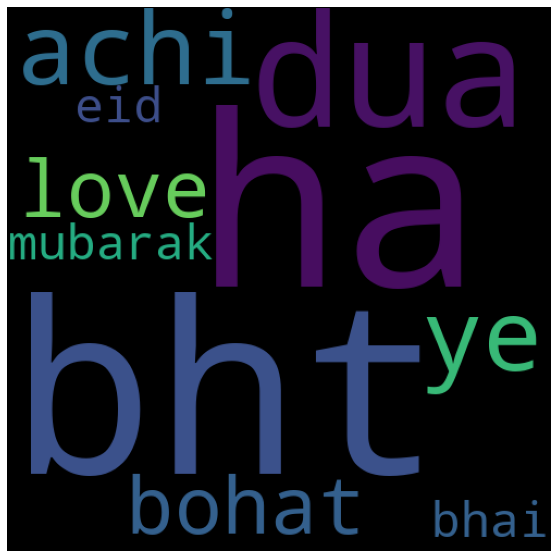

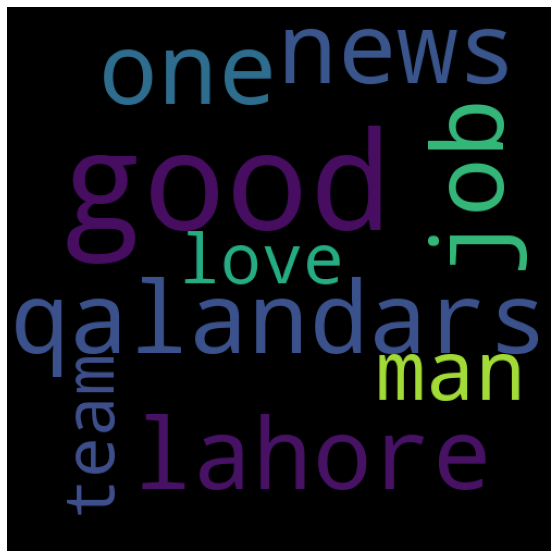

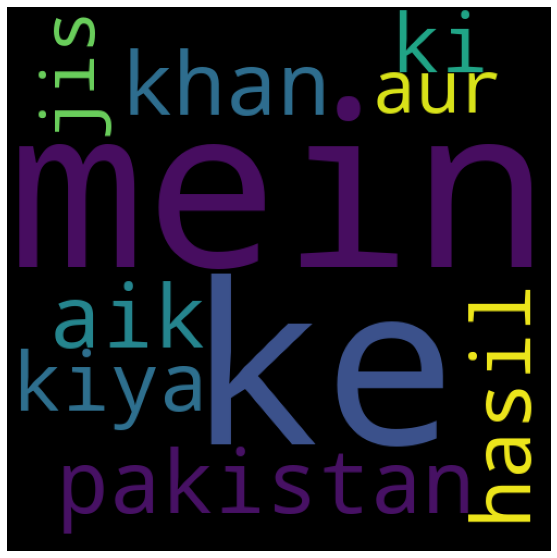

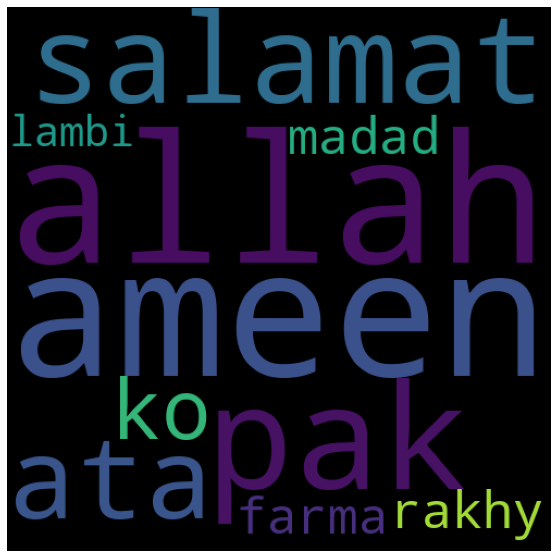

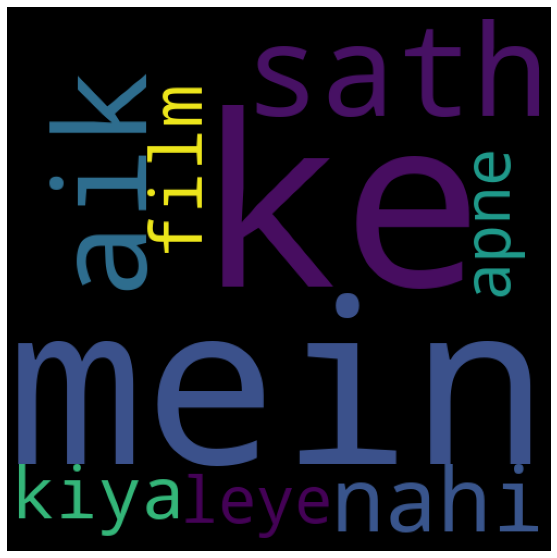

In [ ]:

generateWordCloudForClusters(5,clustermTerms)

Apart from Cluster 0, we can see that all the clusters have pretty positive results that are also correlated to eachother. 

If we examine cluster 1: it talks about giving blessings to the other person in Roman Urdu. Allah means God while salamat means blessings,lambi means longer and ata means to give. It clearly depecits positivty of text giving blessings/prayers.

If we examine cluster 2: it has some english words as well like love and good and a roman word achi also means good, this suggests that its a pretty good cluster as roman word was aligned within an english word in the same cluster. While dua means to pray and it is always given in a positive way.

If we examine cluster 3: it has greeting words like Khair, mubarak which means to celebrate, apko means for you. If we examine cluster 4: It has words like acha, achi which means good while the word mashallah is mostly said when you see something good.

#### **Clustering** **for Negative**

In [ ]:
negtivedf = df[df['Response'] == 'Negative']


In [ ]:
matrixFormNeg,words = vectorFeatures(negtivedf)

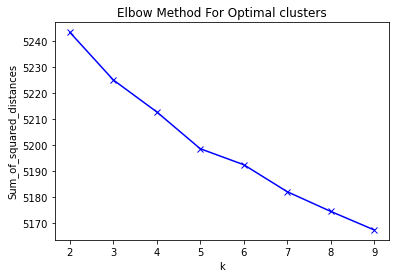

In [ ]:
plotKneeElbow(matrixFormNeg,10)

The knee elbow method above shows turning point at 6 clusters and SSE the continues to decrease as you increase k but it doesnt bend towards at curve starts to bend known as the elbow point, we can use other methods for chossing the K like the silhouette coefficient. However K is not oly choosen by these methods but also with reference to some domain knowledge. We examined clusters with k = 5 and 6 and K = 5 gave the best results that were had smilar values. 

In [ ]:
modelKmeansNeg = performKmeansClustering(6,500,matrixFormNeg)


Initialization complete
Iteration 0, inertia 10303.742734709333
Iteration 1, inertia 5228.594782623688
Iteration 2, inertia 5222.940893107798
Iteration 3, inertia 5218.864960117691
Iteration 4, inertia 5215.152362689033
Iteration 5, inertia 5213.330649645359
Iteration 6, inertia 5213.060218887514
Iteration 7, inertia 5212.927631473143
Iteration 8, inertia 5212.769203533682
Iteration 9, inertia 5212.591560064694
Iteration 10, inertia 5212.191306107012
Iteration 11, inertia 5211.844687594022
Iteration 12, inertia 5211.791756257817
Iteration 13, inertia 5211.766328932482
Iteration 14, inertia 5211.76105543869
Iteration 15, inertia 5211.755630868982
Iteration 16, inertia 5211.741302148792
Iteration 17, inertia 5211.731081248946
Iteration 18, inertia 5211.717502575058
Iteration 19, inertia 5211.712359653547
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 10305.249065873839
Iteration 1, inertia 5238.042740207974
Iteration 2, inertia 5229.7597603266

Iteration 1, inertia 5223.797445507748
Iteration 2, inertia 5208.6473270841425
Iteration 3, inertia 5205.734410732107
Iteration 4, inertia 5205.19881323019
Iteration 5, inertia 5204.677157282844
Iteration 6, inertia 5203.922472624651
Iteration 7, inertia 5203.31576564724
Iteration 8, inertia 5202.681457234208
Iteration 9, inertia 5202.175940717498
Iteration 10, inertia 5201.88509623427
Iteration 11, inertia 5201.686613903385
Iteration 12, inertia 5201.565414806731
Iteration 13, inertia 5201.281485646082
Iteration 14, inertia 5201.137226207673
Iteration 15, inertia 5201.073957367497
Iteration 16, inertia 5200.928330644729
Iteration 17, inertia 5200.723350207023
Iteration 18, inertia 5200.445043173151
Iteration 19, inertia 5200.2846772841995
Iteration 20, inertia 5200.233503942458
Iteration 21, inertia 5200.224342509543
Iteration 22, inertia 5200.220582686008
Converged at iteration 22: strict convergence.


In [ ]:
n_clusters=6
labelsNeg = modelKmeansNeg.labels_
# indices of preferible words in each cluster
ordered_words = modelKmeansNeg.cluster_centers_.argsort()[:, ::-1]

print("Negative centers:", modelKmeansNeg.cluster_centers_)
print("Negative labels", labelsNeg)
print("Negative intertia:", modelKmeansNeg.inertia_)



Negative centers: [[2.44393731e-03 1.24873348e-04 2.39689421e-04 ... 8.71932662e-05
  8.02991001e-04 0.00000000e+00]
 [1.68325905e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.36198146e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.22551787e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.87047647e-03 0.00000000e+00 0.00000000e+00 ... 1.36079642e-03
  0.00000000e+00 5.39346758e-04]]
Negative labels [0 0 4 ... 0 2 0]
Negative intertia: 5193.20445771019


In [ ]:
texts_per_cluster = numpy.zeros(n_clusters)
for i_cluster in range(n_clusters):
    for label in labels:
        if label==i_cluster:
            texts_per_cluster[i_cluster] +=1

In [ ]:
print("Top Negative words per 6 cluster:")
clustermTerms = []
clusterDictionary={}
for i_cluster in range(n_clusters):
    print("Cluster:", i_cluster, "texts:", int(texts_per_cluster[i_cluster])),
    for term in ordered_words[i_cluster, :10]:
        clusterDictionary = {"cluster" : i_cluster,"terms" : words[term]}
        clustermTerms.append(clusterDictionary)
        print("\t"+words[term])

Top Negative words per 6 cluster:
Cluster: 0 texts: 3593
	nahi
	nhi
	allah
	kia
	ni
	hai
	mein
	say
	aunty
	chor
Cluster: 1 texts: 86
	ke
	mein
	aik
	nahi
	bad
	lekin
	khan
	kiya
	apni
	pakistan
Cluster: 2 texts: 839
	ha
	ye
	ma
	ni
	kia
	had
	rhi
	sa
	bat
	nhi
Cluster: 3 texts: 595
	lanat
	per
	py
	is
	pr
	lakh
	allah
	beshumar
	in
	pay
Cluster: 4 texts: 900
	ye
	nahi
	kia
	nhi
	hai
	aap
	log
	phir
	tak
	bhai
Cluster: 5 texts: 0
	to
	police
	jo
	ma
	ko
	allah
	nahi
	ky
	ni
	log


By following the k value where there was a sight bend at K = 6, we can examine the clusters, the clusters have most neutral words as well. Words like kam(work) and dikhaty(to see). Hence we will not use the value of K=6 for Negative clusters. 

In [ ]:
modelKmeansNeg = performKmeansClustering(5,500,matrixFormNeg)


Initialization complete
Iteration 0, inertia 10367.971511064723
Iteration 1, inertia 5239.534797172505
Iteration 2, inertia 5230.689387471342
Iteration 3, inertia 5227.212839455675
Iteration 4, inertia 5224.360529174281
Iteration 5, inertia 5220.422724979715
Iteration 6, inertia 5218.446324920202
Iteration 7, inertia 5217.711833881779
Iteration 8, inertia 5217.121298855013
Iteration 9, inertia 5216.161992549762
Iteration 10, inertia 5214.354001528078
Iteration 11, inertia 5213.74749871841
Iteration 12, inertia 5213.584816019727
Iteration 13, inertia 5213.497971419185
Iteration 14, inertia 5213.413220222515
Iteration 15, inertia 5213.207878172583
Iteration 16, inertia 5212.815765642439
Iteration 17, inertia 5212.185019205774
Iteration 18, inertia 5211.390935836019
Iteration 19, inertia 5210.536037117721
Iteration 20, inertia 5209.779204358627
Iteration 21, inertia 5209.328168274374
Iteration 22, inertia 5209.212841575734
Iteration 23, inertia 5209.100748383987
Iteration 24, inertia 5208

In [ ]:
labelsNeg = modelKmeansNeg.labels_
# indices of preferible words in each cluster
ordered_words = modelKmeansNeg.cluster_centers_.argsort()[:, ::-1]

print("Negative centers:", modelKmeansNeg.cluster_centers_)
print("Negative labels", labelsNeg)
print("Negative intertia:", modelKmeansNeg.inertia_)

Negative centers: [[2.60910141e-03 1.13785035e-04 2.18405845e-04 ... 1.67995784e-04
  7.31688229e-04 3.50944808e-05]
 [1.64136242e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.84553647e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.68766804e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Negative labels [0 0 0 ... 0 4 0]
Negative intertia: 5200.79768213062


In [ ]:
n_clusters=5
texts_per_cluster = numpy.zeros(n_clusters)
for i_cluster in range(n_clusters):
    for label in labels:
        if label==i_cluster:
            texts_per_cluster[i_cluster] +=1

In [ ]:
print("Top Negative words per cluster:")
clustermTerms = []
clusterDictionary={}
for i_cluster in range(n_clusters):
    print("Cluster:", i_cluster, "texts:", int(texts_per_cluster[i_cluster])),
    for term in ordered_words[i_cluster, :10]:
        clusterDictionary = {"cluster" : i_cluster,"terms" : words[term]}
        clustermTerms.append(clusterDictionary)
        print("\t"+words[term])

Top Negative words per cluster:
Cluster: 0 texts: 3593
	ye
	nahi
	nhi
	allah
	ni
	hai
	mein
	aunty
	chor
	bhai
Cluster: 1 texts: 86
	ke
	mein
	aik
	nahi
	bad
	lekin
	khan
	kiya
	pakistan
	apni
Cluster: 2 texts: 839
	lanat
	per
	py
	is
	pr
	lakh
	allah
	beshumar
	in
	pay
Cluster: 3 texts: 595
	kia
	ye
	ni
	nhi
	nahi
	ha
	sath
	tum
	karo
	rha
Cluster: 4 texts: 900
	ha
	ye
	ma
	ni
	rhi
	had
	nahi
	sa
	mulk
	band


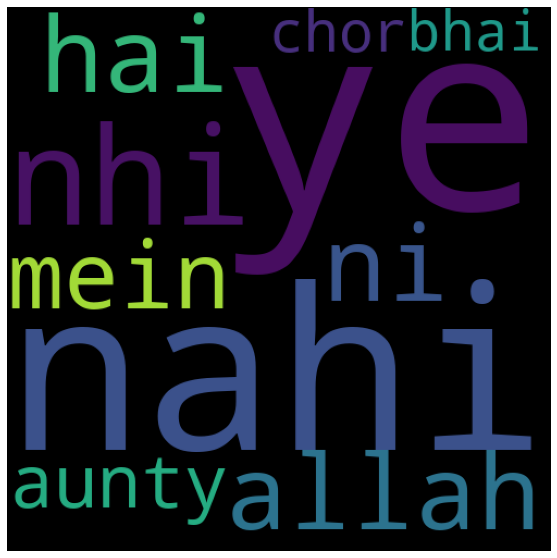

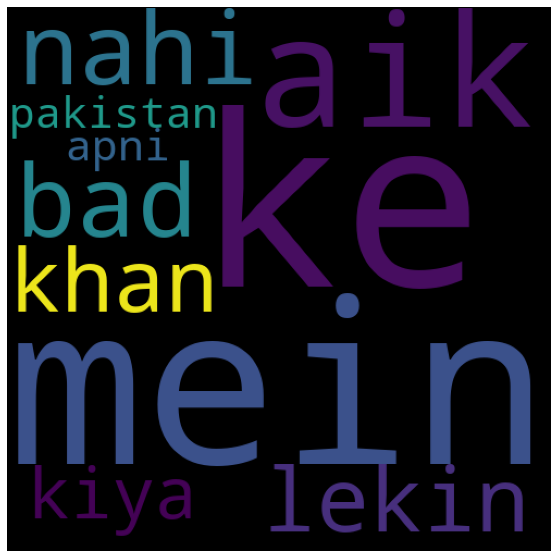

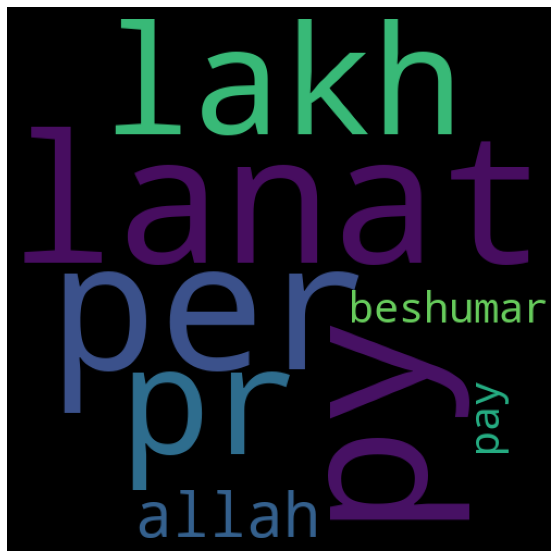

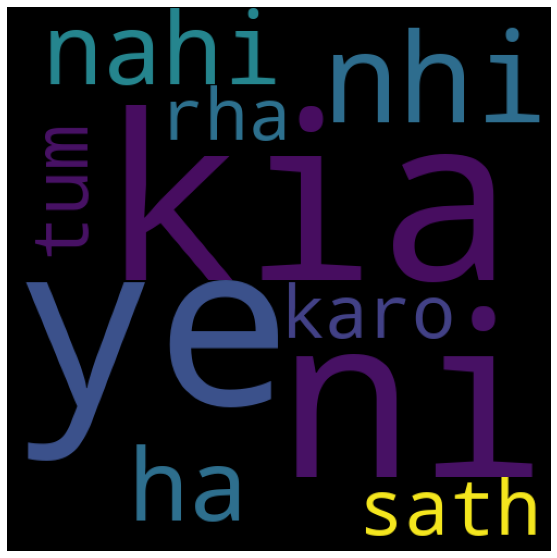

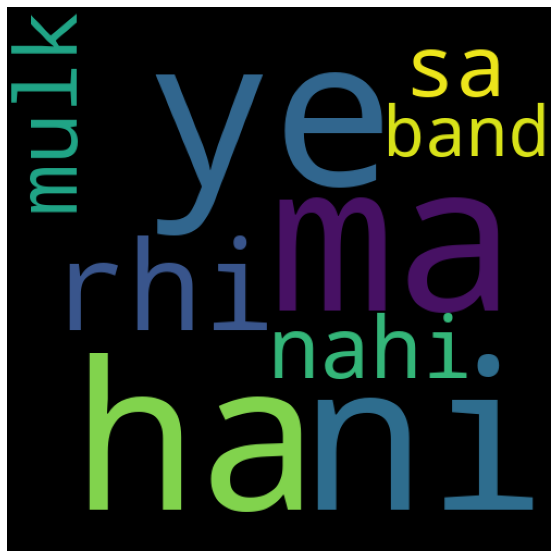

In [ ]:
generateWordCloudForClusters(n_clusters,clustermTerms)

We the word cloud cluster from the analysis above of Negtive clusters we can see from cluster 0 that the most major words are "Lakh Lannat" (say bad things) as a whole, while the literal meaning of lannat is to not give blessings. 

From cluster 1 we can exmaine that nahe( means NO) is used in a negative way. While most people who are from this cluture say "Aunty" to people in context of making a joke of the other person, on the other hand the word "bhai" is used at every sentence mostly by people when they are pissed on something like so much traffic the drivers say " Oh bhai! gari kidr chala raha ha" meaning that "Oh brother, look where are you driving at!!" The word "Allah" means God, its used her aswell as in the Positive cluster as well as sometimes when someone wants to give badwishes (evil intention) they use it by saying stuff like " May God do something bad to you"

While from clusters words like lekin means to oppose something which can be considered as neagtivtity. Nahe means no. There arnt much words for the negative clusters maybe we might need more data or tuning of the K value. 

**Clustering for neutral response** 

In [ ]:
neutraldf = df[df['Response'] == 'Neutral']


In [ ]:
matrixFormNeu,words = vectorFeatures(neutraldf)

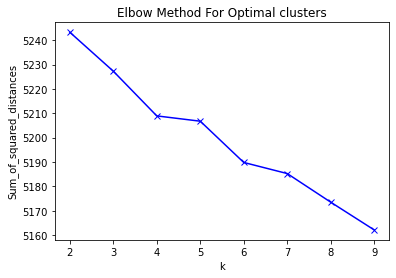

In [ ]:
plotKneeElbow(matrixFormNeg,10)

In [ ]:
modelKmeansNeu = performKmeansClustering(5,500,matrixFormNeu)


Initialization complete
Iteration 0, inertia 8685.687452074248
Iteration 1, inertia 8655.363352379314
Iteration 2, inertia 8653.055069049224
Iteration 3, inertia 8651.746771326118
Iteration 4, inertia 8650.818982882623
Iteration 5, inertia 8650.595785944419
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 17302.903026929635
Iteration 1, inertia 8603.237285790658
Iteration 2, inertia 8593.058516107822
Iteration 3, inertia 8576.206764985352
Iteration 4, inertia 8571.977658034217
Iteration 5, inertia 8571.212077284123
Iteration 6, inertia 8570.857859733043
Iteration 7, inertia 8570.433901575316
Iteration 8, inertia 8570.174009576494
Iteration 9, inertia 8570.161844057306
Iteration 10, inertia 8570.154602398767
Iteration 11, inertia 8570.152880949623
Iteration 12, inertia 8570.151206235027
Iteration 13, inertia 8570.150406657602
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 17333.388878280406
Iteration 

In [ ]:
labelsNeu = modelKmeansNeu.labels_
# indices of preferible words in each cluster
ordered_words = modelKmeansNeg.cluster_centers_.argsort()[:, ::-1]

print("Neutral centers:", modelKmeansNeu.cluster_centers_)
print("Neutral labels", labelsNeu)
print("Neutral intertia:", modelKmeansNeu.inertia_)

Neutral centers: [[1.75633321e-03 7.11455203e-05 1.43081986e-04 ... 5.32167572e-05
  5.61054612e-05 4.84129607e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.35210771e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.43402982e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.02042867e-03]]
Neutral labels [0 0 0 ... 0 0 0]
Neutral intertia: 8561.251439978687


In [ ]:
texts_per_cluster = numpy.zeros(n_clusters)
for i_cluster in range(n_clusters):
    for label in labels:
        if label==i_cluster:
            texts_per_cluster[i_cluster] +=1

In [ ]:
print("Top Neutral words per cluster:")
clustermTerms = []
clusterDictionary={}
for i_cluster in range(n_clusters):
    print("Cluster:", i_cluster, "texts:", int(texts_per_cluster[i_cluster])),
    for term in ordered_words[i_cluster, :10]:
        clusterDictionary = {"cluster" : i_cluster,"terms" : words[term]}
        clustermTerms.append(clusterDictionary)
        print("\t"+words[term])

Top Neutral words per cluster:
Cluster: 0 texts: 3593
	wly
	naysirf
	notifications
	alegre
	now
	haijhagra
	miss
	asifiya
	chupo
	bharhay
Cluster: 1 texts: 86
	khandanon
	miss
	ahrram
	naysirf
	azazi
	lone
	khota
	ksr
	parties
	angrez
Cluster: 2 texts: 839
	lgany
	pic
	qoumiyyat
	italian
	pure
	leony
	alegre
	betey
	interupted
	peyda
Cluster: 3 texts: 595
	krdiaa
	wly
	now
	notifications
	naysirf
	hahaahahahahaha
	sedhi
	treaty
	kehta
	root
Cluster: 4 texts: 900
	hahaahahahahaha
	wly
	malaysia
	now
	rosterm
	hahahahahahahahahahahahah
	naysirf
	sahi
	mutamdi
	bakrio


From the word clouds above of the clusters we can exmaine that these segmented clusters are the most accurate amongst all segmented clusters(Positive and Negative clusters)

For cluster 0: we can examine "nps" means short form of No Problem that, alehda means in english to seprate things, while foj means army and chupy means to hide. We can see how the words are neutral here in this cluster with no positive or negative aspect. 

From cluster 1 we also have city names like italy, other than that most of the words in this cluste are used more generally like lesakty means in english to "have it", puri means all of it and lgate means for put it somewhere. 

From cluster 2: we can exmaine words like khoti which means female donkey, khandis means family, ahsan means to do a favor. etc

From cluster 3: These words are moslty discribing words .

Cluster: 4 Also has some repeating words like "hahahaha", "naz" means to be proud of something, "Kurty" means a shirt and "pohancha" means to be at someplace.

We can exmaine that from all the 5 clusters, cluster 0 and 1 have been the most similar in case of clusters with neutral words in it. 

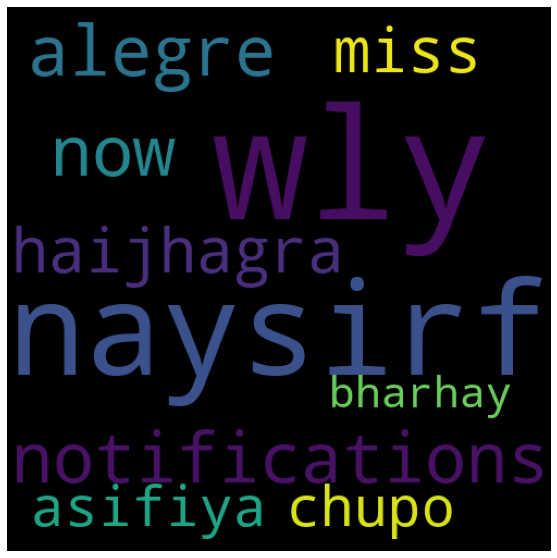

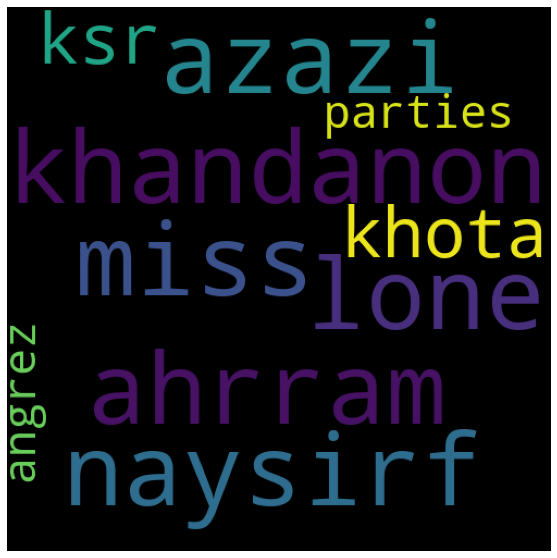

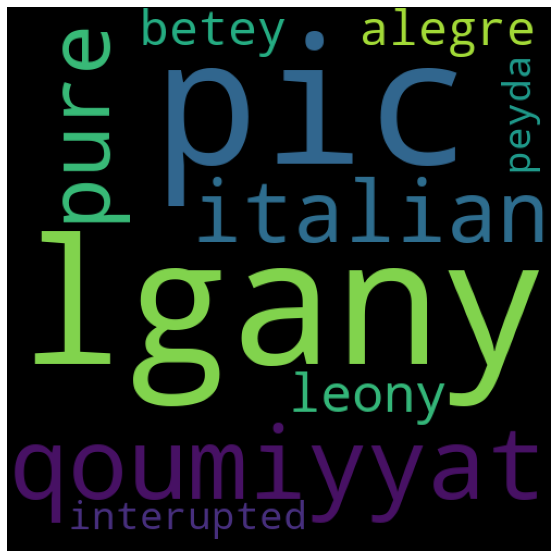

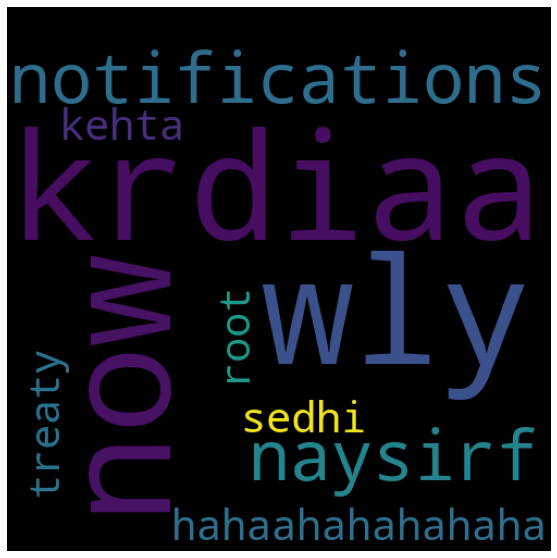

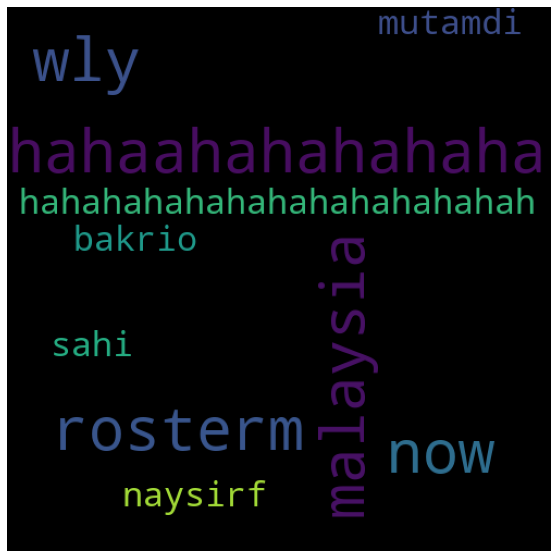

In [ ]:
generateWordCloudForClusters(n_clusters,clustermTerms)

**Text Classification with FastText**

Although FastText could be used for generating vectors from words and doing analysis with classification using FastText vector. However, we just used FastText to analyze words and their similarity using training the model and building a vocabulary upon it for our project scope. 

In [ ]:
from gensim.models import FastText
#from gensim.test.utils import common_texts  # some example sentences

In [ ]:
model = FastText(vector_size=15, window=4, min_count=1)  # instantiate


In [ ]:
model.build_vocab(corpus_iterable=forFastTextData)
model.train(corpus_iterable=forFastTextData, total_examples=len(forFastTextData), epochs=10)

In [ ]:
model.wv.most_similar("insan")

In [ ]:
model.wv.most_similar("larki")

model.wv.similar_by_word("larki") #getting results for words related to Larki(girl), we can see that the most smilar word is (larkitu) however this word might have a spelling error as we would find meaning for this word. However the most smiliar word after this word is beeti which means daughter and daugther is also a girl (larki), kurssi is known as transgender that is categorized as a girl. 

In [ ]:
model.wv.similarity(w1 = 'khushi',w2 = 'achi') 

acha means good, while khushi means happniess and we can exmaine that the smiliary score is 93%

In [ ]:
model.wv.similarity(w1 = 'waqt',w2 = 'gahri')

**Classification: using unbalanced dataset**

---



common libraries for both classification: MultinominalNB and SVM(Support Vector Machine)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

Both SVM and MultinominalNB call below functions

@ Rauf Nugmanov and @ Pinki Sharma

In [ ]:
### We can use this function to do cross-validation 
# use for both naive bayes and SVM

from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator of K folds
    cv = KFold(n_splits=K, random_state=0, shuffle=True)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    print("Mean score: %.3f (+/-%.3f)" % (np.mean(scores), sem(scores)))

In [ ]:
def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.semilogx(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.semilogx(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

common for both MultinominalNB and SVM,
 X is features and y is label

In [ ]:
X = df['Sen_Out_StopWord']
y = df['Response']

we are spliting dataset into train and test by taking 80% training, 20% testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# MultinomialNB (Naive Bayes) 
### @author Rauf Nugmanov

Define data variable and target

In [ ]:
df.columns

Index(['Sentence', 'Response', 'Sentence_Removal', 'Lower_Case',
       'Sen_Out_StopWord', 'stem', 'Stem_On_Original'],
      dtype='object')

In [ ]:
tfidf = TfidfVectorizer()

Apply TFIDF transformation to training dataset.

In [ ]:
X_tfidf = tfidf.fit_transform(X_train.values.astype('U'))

In [ ]:
X_tfidf.shape

(16182, 28440)

Apply TFIDF transformation to testing dataset.

In [ ]:
X_test_tfidf = tfidf.transform(X_test.values.astype('U'))

In [ ]:
X_test_tfidf.shape

(4046, 28440)

In [ ]:
X_tfidf

<16182x28440 sparse matrix of type '<class 'numpy.float64'>'
	with 148386 stored elements in Compressed Sparse Row format>

Lets' set up a pipeline to perform preprocessng of the comments data and classification of the sentiments using Multiomial Naive Bayes

In [ ]:

clf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('nb', MultinomialNB(alpha=0.01)),
])

Evaluate cross validation

In [ ]:
evaluate_cross_validation(clf, X_train, y_train, 5)

[0.60951498 0.60982391 0.61650185 0.60012361 0.6131026 ]
Mean score: 0.610 (+/-0.003)


In [ ]:
alphas = np.logspace(-2, 1, 20)
print(alphas)

[ 0.01        0.0143845   0.02069138  0.02976351  0.04281332  0.06158482
  0.08858668  0.1274275   0.18329807  0.26366509  0.37926902  0.54555948
  0.78475997  1.12883789  1.62377674  2.33572147  3.35981829  4.83293024
  6.95192796 10.        ]


nb__alpha = 0.01 Train = 0.9473488812935834 Test = 0.6098133906740397
nb__alpha = 0.01438449888287663 Train = 0.9461747352716937 Test = 0.6116055741459705
nb__alpha = 0.0206913808111479 Train = 0.9447688502802472 Test = 0.6132741100371821
nb__alpha = 0.029763514416313176 Train = 0.9431003347117901 Test = 0.6160549204519896
nb__alpha = 0.04281332398719394 Train = 0.9409219888753217 Test = 0.6175997514828735
nb__alpha = 0.06158482110660264 Train = 0.9376622028681757 Test = 0.6203190435985647
nb__alpha = 0.08858667904100823 Train = 0.9333673039574851 Test = 0.6229764355510852
nb__alpha = 0.12742749857031335 Train = 0.9275583809312916 Test = 0.6253246512721992
nb__alpha = 0.18329807108324356 Train = 0.9189376903090396 Test = 0.6280436569898497
nb__alpha = 0.26366508987303583 Train = 0.906439241900739 Test = 0.6286618567070412
nb__alpha = 0.37926901907322497 Train = 0.8895532054383789 Test = 0.6286617230546223
nb__alpha = 0.5455594781168517 Train = 0.8669509482207849 Test = 0.62711712114217

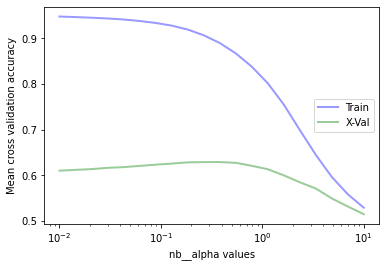

In [ ]:
train_scores, test_scores = calc_params(X_train, y_train, clf, alphas, 'nb__alpha', 5)

In [ ]:
mnb = MultinomialNB(alpha= 0.37)

In [ ]:
mnb.fit(X_tfidf, y_train)

MultinomialNB(alpha=0.37)

Checking performance on Test portion of the dataset

In [ ]:
mnb_pred = mnb.predict(X_test_tfidf)
print(mnb_pred)

['Positive' 'Neutral' 'Neutral' ... 'Neutral' 'Neutral' 'Negative']


Printing classification report

In [ ]:
from sklearn.metrics import classification_report
mnb_cr = classification_report(mnb_pred, y_test)
print(mnb_cr)

              precision    recall  f1-score   support

    Negative       0.39      0.67      0.49       622
     Neutral       0.80      0.62      0.70      2312
    Positive       0.61      0.64      0.62      1112

    accuracy                           0.64      4046
   macro avg       0.60      0.64      0.61      4046
weighted avg       0.68      0.64      0.65      4046



From above, we can see Overall accuracy increase to 64% using parameter alphas compared to accuracy we obtained without parameter which is 61%

# SVM(Support Vector Machine)
@ Pinki Sharma

In [ ]:
X_train.shape

(16182,)

In [ ]:
X_test.shape

(4046,)

In [ ]:
# Perform classification with SVM, kernel=linear and invoking a pipeline.
from sklearn import svm
from sklearn.svm import SVC
classifier_linear = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='linear')),
])

Full pipeline is passed as the model to the cross validation

In [ ]:
# SVM without tunning calling cross validation method above.
evaluate_cross_validation(classifier_linear, X_train, y_train, 5)

[0.64102564 0.63762743 0.631644   0.63442522 0.64307787]
Mean score: 0.638 (+/-0.002)


 We can see from above cross validation execution that mean score is 64% and variance is very low.

Below we will now try to tune the parameter for SVM linear model for better fit.

svc__C = 1 Train = 0.8854900586248359 Test = 0.6375600338026061
svc__C = 5 Train = 0.9827431568406352 Test = 0.615931024659635
svc__C = 10 Train = 0.9909621718333581 Test = 0.6049308959714488
svc__C = 50 Train = 0.9963539680559178 Test = 0.5884931758984211
svc__C = 100 Train = 0.9970955361000685 Test = 0.5847854095854751


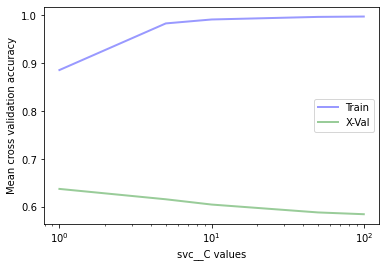

In [ ]:
# We are tuning the c_vals parameter using the fixed range of array parameters. We can take larger sets but that would taken more time to execute so taking samlelr sets here.
c_vals = [1, 5, 10, 50, 100]
# We calculate train and test score by calling calc_params with c_vals as tuned parameter and 5 k folds.
train_scores, test_scores = calc_params(X_train, y_train, classifier_linear, c_vals, 'svc__C', 5)

We see Training data score is much better and improving with tuning as per the above data; on the otherhand, testing score is gradually decreasing. We can also see at C value 10 we get better value of score for training and testing and pretty much after that it is same. So we will assume C value as 10 as tuned parameter.

We will try now a more systemtic grid search, this time using a Radial Basis Funtion (RBF) kernel. We'll explore the parameter space for the same values of C as above, as well as for the values of the gamma parameter used to control the width of the RBF function (this is generally a very small value).

In [ ]:
# passing gamma and original C parameter from above to get a grid of combination of C and gamma parameter.
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

parameters = {
    'svc__gamma': np.logspace(-3, 0, 4),
    'svc__C': [1, 5, 10, 50, 100],
}

clf_rbf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='rbf')),
])

In [ ]:
gs = GridSearchCV(clf_rbf, parameters, verbose=2, cv=3)

In [ ]:
gs.fit(X, y)
gs.best_params_, gs.best_score_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] svc__C=1, svc__gamma=0.001 ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... svc__C=1, svc__gamma=0.001, total=  29.3s
[CV] svc__C=1, svc__gamma=0.001 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.2s remaining:    0.0s


[CV] ....................... svc__C=1, svc__gamma=0.001, total=  29.0s
[CV] svc__C=1, svc__gamma=0.001 ......................................
[CV] ....................... svc__C=1, svc__gamma=0.001, total=  31.1s
[CV] svc__C=1, svc__gamma=0.01 .......................................
[CV] ........................ svc__C=1, svc__gamma=0.01, total=  30.5s
[CV] svc__C=1, svc__gamma=0.01 .......................................
[CV] ........................ svc__C=1, svc__gamma=0.01, total=  30.4s
[CV] svc__C=1, svc__gamma=0.01 .......................................
[CV] ........................ svc__C=1, svc__gamma=0.01, total=  30.0s
[CV] svc__C=1, svc__gamma=0.1 ........................................
[CV] ......................... svc__C=1, svc__gamma=0.1, total=  28.0s
[CV] svc__C=1, svc__gamma=0.1 ........................................
[CV] ......................... svc__C=1, svc__gamma=0.1, total=  31.4s
[CV] svc__C=1, svc__gamma=0.1 ........................................
[CV] .

[CV] ....................... svc__C=100, svc__gamma=1.0, total=  56.1s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 35.7min finished


({'svc__C': 5, 'svc__gamma': 1.0}, 0.5462236830591712)

From above value we observed that each time, it is taking more than  35sec and got svc_C = 5, svc_gamma = 1.o and accuracy is 54%. We can see with the help of grid search we got better combination of C and gamma parameters with values 5 and 1 respectively. By doing a 3 fold cross validation we got 55% accuracy.

We will now train the final model with these parameters on the full training data and evaluate it on the test set.

In [ ]:
classifier_rbf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='rbf', C=5, gamma=1)),
])

In [ ]:
# Fitting the final classifier
classifier_rbf.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()), ('svc', SVC(C=5, gamma=1))])

In [ ]:
# Predicting on test set
svc_pred = classifier_rbf.predict(X_test)

In [ ]:
# training on the entire set
print(classifier_rbf.score(X_test, y_test))

0.6626297577854672


In [ ]:
print("SVM rbf Accuracy:" , metrics.accuracy_score(y_test,svc_pred))

SVM rbf Accuracy: 0.6626297577854672


By training on the entire training set we got the accuracy of 66% which is slightly better than mnb Naive Bayes whcih was 64%

Also by tuning the SVM model as shown above , we see a slight increase in Accuracy score from SVM linear.

In [ ]:
# classification report 
# removing stopWord from our dataset
svm_cr = classification_report(y_test,svc_pred)
print(svm_cr)

              precision    recall  f1-score   support

    Negative       0.67      0.50      0.58      1059
     Neutral       0.65      0.79      0.72      1811
    Positive       0.67      0.61      0.64      1176

    accuracy                           0.66      4046
   macro avg       0.67      0.63      0.64      4046
weighted avg       0.66      0.66      0.66      4046



We see precision is almost same for all kind of class labels above which is almost same as overall score of 66%. f1-scroe is changing maybe because of the imbalance in data as we have Neutral dataset more than poistive and negative. Data is not equally balanced in the dataset. Overall showing equal distribution of accuracy though so we can take this model. 

In comparison to Naive Bayes SVM overall performed better across all features. Negative class lable had 39% in naive Bayes which is increase to 67% accuracy prediction.

In [ ]:
# creating a confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, svc_pred)

In [ ]:
mat.T

array([[ 532,  159,  100],
       [ 399, 1433,  360],
       [ 128,  219,  716]], dtype=int64)

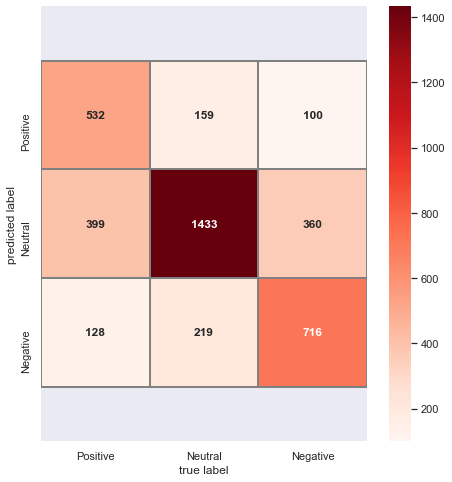

In [ ]:
#plotting a heatmap from the confusion matrix value above for better visulization.
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(mat.T, square=True, linecolor='grey', linewidths=1, annot=True, 
            fmt='d', cbar=True, cmap='Reds', ax=ax, annot_kws={"fontsize":12, "weight":"bold"},
            xticklabels=y_test.unique(),
            yticklabels=y_test.unique())
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('true label')
plt.ylabel('predicted label');

We see from above confusion matrix heat map that away from the diagnol we do not see any DARK RED color boxes which suggest the model did pretty well here even though the dataset is unbalanced.

**Testing our SVM classifier created model for outside data**


In [ ]:
comment = """achha lagta hain """ # I like it
print(classifier_rbf.predict([comment]))

['Positive']


In [ ]:
comment = """umaima ka dimag kharab hain aaj""" # Umiama is mad today 
print(classifier_rbf.predict([comment]))

['Negative']


In [ ]:
comment = """Rauf kya chal rahan hain""" # what's going on Rauf
print(classifier_rbf.predict([comment]))

['Neutral']


From above testing, it looks like our model is working perfectly. It is capable to distinguish negative, positive and neutral comments.
We did testing by  pasing a cleaned comment in our model to test the prediction accuracy of our model's sentiments.

**We are redoing both Naive bayes and SVM on dataset without removing stopwords in oder to see whether accuracy of our model will improve or not.**

**MultinominalNB and SVM classifiers on dataset without removing stopWord**

In [ ]:
# the below is original dataset changed to lower case,punctuation only and not cleaned with stop words.
X = df['Lower_Case']
y = df['Response']

In [ ]:
X

0        sai kha ya her kisi kay bus ki bat nhi hai lak...
1                                                sahi bt h
2                                               kya bt hai
3                                               wah je wah
4                                     are wha kaya bat hai
                               ...                        
20224             hamari jese awam teli laga k mazay leti 
20225    kaash hum b parhay likhay hotaykabhi likhtay g...
20226    bahi sayasat kufrrr ha saaaf bttttt ha qanon s...
20227                       aanti toh gussa e kr gai hain 
20228    mai b sirf shadi kanry ki waja say imran khan ...
Name: Lower_Case, Length: 20228, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
X_tfidf = tfidf.fit_transform(X_train.values.astype('U'))

In [ ]:
X_tfidf.shape

(16182, 28449)

In [ ]:
X_test_tfidf = tfidf.transform(X_test.values.astype('U'))

In [ ]:
X_test_tfidf.shape

(4046, 28449)

In [ ]:
### Lets' set up a pipeline to perform preprocessng of the data and 
### classification of the documents using Multiomial Naive Bayes

clf_2 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('nb', MultinomialNB(alpha=0.01)),
])

In [ ]:
evaluate_cross_validation(clf_2, X_train, y_train, 5)

[0.61445783 0.60982391 0.61897404 0.60290482 0.618356  ]
Mean score: 0.613 (+/-0.003)


In [ ]:
alphas = np.logspace(-2, 1, 20)
print(alphas)

[ 0.01        0.0143845   0.02069138  0.02976351  0.04281332  0.06158482
  0.08858668  0.1274275   0.18329807  0.26366509  0.37926902  0.54555948
  0.78475997  1.12883789  1.62377674  2.33572147  3.35981829  4.83293024
  6.95192796 10.        ]


nb__alpha = 0.01 Train = 0.9469626818999227 Test = 0.6129033200406456
nb__alpha = 0.01438449888287663 Train = 0.9455567957150588 Test = 0.6142629660984913
nb__alpha = 0.0206913808111479 Train = 0.944104550040794 Test = 0.6172293051639858
nb__alpha = 0.029763514416313176 Train = 0.9423587869557337 Test = 0.6193922213528451
nb__alpha = 0.04281332398719394 Train = 0.9398096630642767 Test = 0.6219257175130111
nb__alpha = 0.06158482110660264 Train = 0.9360709348163214 Test = 0.6253864750625588
nb__alpha = 0.08858667904100823 Train = 0.931127173712692 Test = 0.6268696350487047
nb__alpha = 0.12742749857031335 Train = 0.9240513952331451 Test = 0.6290943750279239
nb__alpha = 0.18329807108324356 Train = 0.9147200544293774 Test = 0.6290944132143292
nb__alpha = 0.26366508987303583 Train = 0.9008466484396038 Test = 0.6280439242946876
nb__alpha = 0.37926901907322497 Train = 0.8824774699218556 Test = 0.628600128382695
nb__alpha = 0.5455594781168517 Train = 0.8576196503800407 Test = 0.6241506866106625

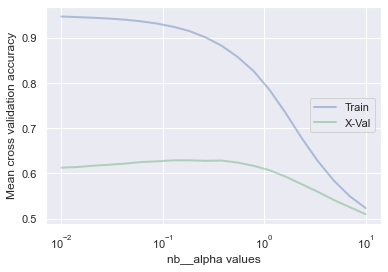

In [ ]:
train_scores, test_scores = calc_params(X_train, y_train, clf_2, alphas, 'nb__alpha', 5)

In [ ]:
mnb_2 = MultinomialNB(alpha= 0.18)

In [ ]:
mnb_2.fit(X_tfidf, y_train)

MultinomialNB(alpha=0.18)

In [ ]:
#Performance on the test data
mnb_pred_2 = mnb_2.predict(X_test_tfidf)
print(mnb_pred_2)

['Positive' 'Neutral' 'Neutral' ... 'Neutral' 'Neutral' 'Negative']


In [ ]:
mnb_cr_2 = classification_report(mnb_pred_2, y_test)
print(mnb_cr_2)

              precision    recall  f1-score   support

    Negative       0.45      0.63      0.52       753
     Neutral       0.76      0.65      0.70      2139
    Positive       0.62      0.64      0.63      1154

    accuracy                           0.64      4046
   macro avg       0.61      0.64      0.62      4046
weighted avg       0.66      0.64      0.65      4046



**From** above, we can see Overall accuracy increase to 64% withot removing stopwords from our dataset which is unchanged with using stopwords which was also 64% for mnb Naive Bayes.

**Now Using SVM classifier for the dataset without removing stopWords**

In [ ]:
# Perform classification with SVM, kernel=linear, calling pipeline
from sklearn import svm
from sklearn.svm import SVC
classifi_linear = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='linear')),
])

In [ ]:
#SVM without tunning calling cross validation method above.
evaluate_cross_validation(classifi_linear, X_train, y_train, 5)

[0.64874884 0.65400062 0.64647713 0.64276885 0.65111248]
Mean score: 0.649 (+/-0.002)


We can see from above cross validation execution that mean score without tuning the SVM model is 65%.

Below we will now try to using tunning parameter for better fit.

svc__C = 1 Train = 0.8785688205283533 Test = 0.6486215853238952
svc__C = 5 Train = 0.9812291374988014 Test = 0.6232232151960508
svc__C = 10 Train = 0.9901742514603102 Test = 0.612346734088584
svc__C = 50 Train = 0.9966629545420778 Test = 0.5944257012837888
svc__C = 100 Train = 0.9971727824232541 Test = 0.5910887058741766


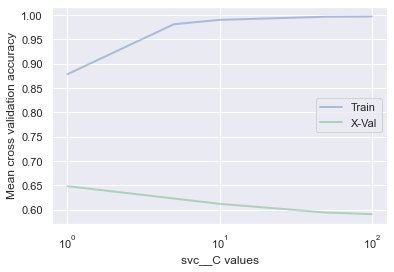

In [ ]:
# We are tuning the c_vals parameter using the fixed range of array parameters.
c_vals = [1, 5, 10, 50, 100]

# calling calc_params function from above
train_scores, test_scores = calc_params(X_train, y_train, classifi_linear, c_vals, 'svc__C', 5)

We see Training data score is much better and improving while testing data score is decreasing with tuning as per the above data. We can see at C value 10 we get better value of score for training and testing and pretty much after that it is same. So we will assume C value as 10 as tuned parameter.



We will try now a more systemtic grid search, this time using a Radial Basis Funtion (RBF) kernel. We'll explore the parameter space for the same values of C as above, as well as for the values of the gamma parameter used to control the width of the RBF function (this is generally a very small value).

In [ ]:
parameters = {
    'svc__gamma': np.logspace(-3, 0, 4),
    'svc__C': [1, 5, 10, 50, 100],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

clf_rbf_2 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='rbf')),
])

In [ ]:
gs = GridSearchCV(clf_rbf_2, parameters, verbose=2, cv=3)

In [ ]:
gs.fit(X, y)
gs.best_params_, gs.best_score_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] svc__C=1, svc__gamma=0.001 ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... svc__C=1, svc__gamma=0.001, total=  38.4s
[CV] svc__C=1, svc__gamma=0.001 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.3s remaining:    0.0s


[CV] ....................... svc__C=1, svc__gamma=0.001, total=  35.7s
[CV] svc__C=1, svc__gamma=0.001 ......................................
[CV] ....................... svc__C=1, svc__gamma=0.001, total=  40.7s
[CV] svc__C=1, svc__gamma=0.01 .......................................
[CV] ........................ svc__C=1, svc__gamma=0.01, total=  39.0s
[CV] svc__C=1, svc__gamma=0.01 .......................................
[CV] ........................ svc__C=1, svc__gamma=0.01, total=  41.3s
[CV] svc__C=1, svc__gamma=0.01 .......................................
[CV] ........................ svc__C=1, svc__gamma=0.01, total=  38.7s
[CV] svc__C=1, svc__gamma=0.1 ........................................
[CV] ......................... svc__C=1, svc__gamma=0.1, total=  38.1s
[CV] svc__C=1, svc__gamma=0.1 ........................................
[CV] ......................... svc__C=1, svc__gamma=0.1, total=  35.3s
[CV] svc__C=1, svc__gamma=0.1 ........................................
[CV] .

[CV] ....................... svc__C=100, svc__gamma=1.0, total= 1.3min


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 46.9min finished


({'svc__C': 5, 'svc__gamma': 1.0}, 0.5500796875479116)

From above value we observed that each time is taking more than 41 sec and got svc_C = 5, svc_gamma = 1.o and accuracy is 55%. We can see with the help of grid search we got better combination of C and gamma parameters with values 5 and 1 respectively. By doing a 3 fold cross validation we got 55% accuracy.

We will now train the final model with these parameters on the full training data and evaluate it on the test set.

In [ ]:
# using kernel = rbf
classifi_rbf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='rbf', C=5, gamma=1.0)),
])

In [ ]:
# fitting entire training data
classifi_rbf.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()), ('svc', SVC(C=5, gamma=1.0))])

In [ ]:
# predicting on test set
svc_pred_2 = classifi_rbf.predict(X_test)

In [ ]:
# predicting on entire test dataset
print(classifi_rbf.score(X_test, y_test))

0.6683143845773604


By training on the entire training set we got the accuracy of 67%

In [ ]:
print("SVM rbf Accuracy:" , metrics.accuracy_score(y_test,svc_pred_2))

SVM rbf Accuracy: 0.6683143845773604


In [ ]:
# classification report using 
# dataset without removing stopWord
svm_cr_2 = classification_report(y_test,svc_pred_2)
print(svm_cr_2)

              precision    recall  f1-score   support

    Negative       0.65      0.51      0.57      1059
     Neutral       0.67      0.79      0.72      1811
    Positive       0.68      0.63      0.65      1176

    accuracy                           0.67      4046
   macro avg       0.67      0.64      0.65      4046
weighted avg       0.67      0.67      0.66      4046



**From above classification report we can see the overall result of accuracy is 67% without removing stop words from our dataset which is again a slight change of 1% from the model which had stop words cleaned from the dataset.**

***Thus, we will use the model which we created initially with removing stopwords from our dataset.***



**In order to check for improving the accuracy score of our model for both Naive Bayes and SVM we are trying to balance the dataset by removing the Neutral class label from our target feature set.**

@ Author Pinki Sharma

In [ ]:
# Dropping neutral sentiment sentences. 
data = roman_urdu_df[roman_urdu_df.Response != 'Neutral']

In [ ]:
data = pd.DataFrame(data[['Sentence', 'Response']]) #converting into dataframe

In [ ]:
data['Response'].value_counts()

Positive    6013
Negative    5287
Name: Response, dtype: int64

After removing neutral, we changed unbalanced dataset into balance dataset as positive and negative class label names had almost similar counts whereas Neutral was 50% more.

Calling all the Normalization technique from above

In [ ]:
# removing all the punctuation by calling remove_punct function from above
data['Sentence_Removal'] = data['Sentence'].apply(lambda x: remove_punct(str(x))) 

In [ ]:
data['Lower_Case'] = data['Sentence_Removal'].apply(lambda x: convert_to_lower_case(str(x))) #calling lower case on each line

In [ ]:
data['Sen_Out_StopWord'] = data['Lower_Case'].apply(lambda x: removeStopWordss(x)) # sentence with removed stop words
data.head()

,Sentence,Response,Sentence_Removal,Lower_Case,Sen_Out_StopWord
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha her kisi bus bat nhi lakin ki hal kal ...
1,sahi bt h,Positive,sahi bt h,sahi bt h,sahi bt
2,"Kya bt hai,",Positive,Kya bt hai,kya bt hai,bt
3,Wah je wah,Positive,Wah je wah,wah je wah,wah wah
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai,are wha kaya bat hai,are wha kaya bat


**Classification on balanced dataset:**

common for both MultinominalNB and SVM X is features and y is label

In [ ]:
X = data['Sen_Out_StopWord']
y = data['Response']

**MultinominialNB for balanced dataset**

we are spliting dataset into train and test by taking 80, 20 ratio.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [ ]:
X_train.shape

(9040,)

In [ ]:
X_test.shape

(2260,)

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
X_tfidf = tfidf.fit_transform(X_train.values.astype('U'))

In [ ]:
X_tfidf.shape

(9040, 22079)

In [ ]:
X_test_tfidf = tfidf.transform(X_test.values.astype('U'))

In [ ]:
X_test_tfidf.shape

(2260, 22079)

In [ ]:
X_tfidf

<9040x22079 sparse matrix of type '<class 'numpy.float64'>'
	with 99222 stored elements in Compressed Sparse Row format>

In [ ]:
### Lets' set up a pipeline to perform preprocessng of the data and 
### classification of the documents using Multiomial Naive Bayes

B_clf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('nb', MultinomialNB(alpha=0.01)),
])

The full above pipeline is beign passed as the model to the cross validation function.

In [ ]:
evaluate_cross_validation(B_clf, X_train, y_train, 5)

[0.76548673 0.76106195 0.76161504 0.77599558 0.75442478]
Mean score: 0.764 (+/-0.004)


We obtained mean score without using tuning parameter, after cross validation 76%.

In [ ]:
alphas = np.logspace(-2, 1, 20)
print(alphas)

[ 0.01        0.0143845   0.02069138  0.02976351  0.04281332  0.06158482
  0.08858668  0.1274275   0.18329807  0.26366509  0.37926902  0.54555948
  0.78475997  1.12883789  1.62377674  2.33572147  3.35981829  4.83293024
  6.95192796 10.        ]


nb__alpha = 0.01 Train = 0.9797013274336284 Test = 0.763716814159292
nb__alpha = 0.01438449888287663 Train = 0.9789823008849557 Test = 0.7644911504424778
nb__alpha = 0.0206913808111479 Train = 0.9779867256637168 Test = 0.7655973451327434
nb__alpha = 0.029763514416313176 Train = 0.9767146017699115 Test = 0.7673672566371682
nb__alpha = 0.04281332398719394 Train = 0.9752212389380531 Test = 0.7694690265486726
nb__alpha = 0.06158482110660264 Train = 0.9730088495575222 Test = 0.7724557522123894
nb__alpha = 0.08858667904100823 Train = 0.9705752212389381 Test = 0.7765486725663717
nb__alpha = 0.12742749857031335 Train = 0.9671183628318584 Test = 0.7790929203539824
nb__alpha = 0.18329807108324356 Train = 0.9629977876106196 Test = 0.7814159292035399
nb__alpha = 0.26366508987303583 Train = 0.9573285398230087 Test = 0.7837389380530974
nb__alpha = 0.37926901907322497 Train = 0.9513550884955752 Test = 0.7831858407079647
nb__alpha = 0.5455594781168517 Train = 0.9428097345132743 Test = 0.78042035398230

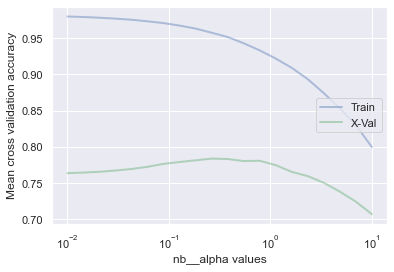

In [ ]:
train_scores, test_scores = calc_params(X_train, y_train, B_clf, alphas, 'nb__alpha', 5)

Looking at the graph and training, testing score, we observed that at alpha = 0.78, both training and testing score value is perfect. After that point both training and testing score started to decline.

In [ ]:
B_mnb = MultinomialNB(alpha= 0.78)

In [ ]:
B_mnb.fit(X_tfidf, y_train)

MultinomialNB(alpha=0.78)

In [ ]:
### Performance on the test data
B_mnb_pred = B_mnb.predict(X_test_tfidf)
print(B_mnb_pred)

['Positive' 'Positive' 'Negative' ... 'Negative' 'Negative' 'Positive']


In [ ]:
B_mnb_cr = classification_report(B_mnb_pred, y_test)
print(B_mnb_cr)

              precision    recall  f1-score   support

    Negative       0.69      0.77      0.73       904
    Positive       0.83      0.77      0.80      1356

    accuracy                           0.77      2260
   macro avg       0.76      0.77      0.76      2260
weighted avg       0.78      0.77      0.77      2260



We obtained 77% accuracy with tuning parameter. While comparing accuracy between balance dataset and the unbalanced datsets multinomialNB accuracy which is 64%, the balance dataset accuracy is way better.

**SVM (Support Vector Machine) for balanced dataset**

In [ ]:
# Perform classification with SVM, kernel=linear and invoking a pipeline.
from sklearn import svm
from sklearn.svm import SVC
B_classifier_linear = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='linear')),
])

In [ ]:
# SVM without tunning calling cross validation method above.
evaluate_cross_validation(B_classifier_linear, X_train, y_train, 5)

[0.77378319 0.78152655 0.78318584 0.78926991 0.77488938]
Mean score: 0.781 (+/-0.003)


We can see from above cross validation execution that mean score without tuning the SVM model is 78%.

svc__C = 1 Train = 0.954424778761062 Test = 0.7805309734513274
svc__C = 5 Train = 0.9958241150442477 Test = 0.7573008849557523
svc__C = 10 Train = 0.9981747787610619 Test = 0.7504424778761063
svc__C = 50 Train = 0.9990597345132743 Test = 0.7430309734513274
svc__C = 100 Train = 0.9994469026548674 Test = 0.7414823008849558


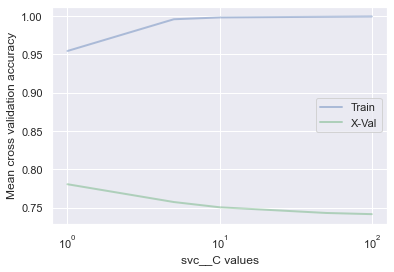

In [ ]:
# We are tuning the c_vals parameter using the fixed range of array parameters. We can take larger sets but that would taken more time to execute so taking samlelr sets here.
c_vals = [1, 5, 10, 50, 100]
# We calculate train and test score by calling calc_params with c_vals as tuned parameter and 5 k folds.
train_scores, test_scores = calc_params(X_train, y_train, B_classifier_linear, c_vals, 'svc__C', 5)

We see Training data score is much better and improving with tuning on the other hand, testing score is decreasing as per the above data. We can also, see at C value 10 we get better value of score for training and testing and pretty much after that it is same. So we will assume C value as 10 as tuned parameter.

We will try now a more systemtic grid search, this time using a Radial Basis Funtion (RBF) kernel. We'll explore the parameter space for the same values of C as above, as well as for the values of the gamma parameter used to control the width of the RBF function (this is generally a very small value).

In [ ]:
# passing gamma and original C parameter from above to get a grid of combination of C and gamma parameter.
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

parameters = {
    'svc__gamma': np.logspace(-3, 0, 4),
    'svc__C': [1, 5, 10, 50, 100],
}
B_clf_rbf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='rbf')),
])
gs = GridSearchCV(B_clf_rbf, parameters, verbose=2, cv=3)
gs.fit(X, y)
gs.best_params_, gs.best_score_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] svc__C=1, svc__gamma=0.001 ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... svc__C=1, svc__gamma=0.001, total=  10.2s
[CV] svc__C=1, svc__gamma=0.001 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s remaining:    0.0s


[CV] ....................... svc__C=1, svc__gamma=0.001, total=   9.3s
[CV] svc__C=1, svc__gamma=0.001 ......................................
[CV] ....................... svc__C=1, svc__gamma=0.001, total=   9.9s
[CV] svc__C=1, svc__gamma=0.01 .......................................
[CV] ........................ svc__C=1, svc__gamma=0.01, total=  11.2s
[CV] svc__C=1, svc__gamma=0.01 .......................................
[CV] ........................ svc__C=1, svc__gamma=0.01, total=   9.4s
[CV] svc__C=1, svc__gamma=0.01 .......................................
[CV] ........................ svc__C=1, svc__gamma=0.01, total=   9.4s
[CV] svc__C=1, svc__gamma=0.1 ........................................
[CV] ......................... svc__C=1, svc__gamma=0.1, total=   8.3s
[CV] svc__C=1, svc__gamma=0.1 ........................................
[CV] ......................... svc__C=1, svc__gamma=0.1, total=   7.7s
[CV] svc__C=1, svc__gamma=0.1 ........................................
[CV] .

[CV] ....................... svc__C=100, svc__gamma=1.0, total=   9.8s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  9.2min finished


({'svc__C': 1, 'svc__gamma': 1.0}, 0.6976108262006244)

From above value we observed that each time is taking more than 10 sec and got svc_C = 1, svc_gamma = 1.o and accuracy is 69%. We can see with the help of grid search we got better combination of C and gamma parameters with values 1 and 1 respectively.

In [ ]:
B_classifier_rbf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='rbf', C=1, gamma= 1.0)),
])

We will now train the final model with these parameters on the full training data and evaluate it on the test set.

In [ ]:
# Fitting the final classifier
B_classifier_rbf.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()), ('svc', SVC(C=1, gamma=1.0))])

In [ ]:
# Predicting on test set
B_svc_pred = B_classifier_rbf.predict(X_test)

In [ ]:
# training on the entire test set
print(B_classifier_rbf.score(X_test, y_test))

0.772566371681416


By training on the entire training set we got the accuracy of 77%

In [ ]:
print("SVM rbf Accuracy:" , metrics.accuracy_score(y_test,B_svc_pred))

SVM rbf Accuracy: 0.772566371681416


In [ ]:
# results
B_svm_cr = classification_report(y_test,B_svc_pred)
print(B_svm_cr)

              precision    recall  f1-score   support

    Negative       0.73      0.78      0.75      1006
    Positive       0.81      0.77      0.79      1254

    accuracy                           0.77      2260
   macro avg       0.77      0.77      0.77      2260
weighted avg       0.77      0.77      0.77      2260



From above classification report we got the accuracy 77% which is value is higher then Multinomial acuracy which is 76%.

In [ ]:
# creating a confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

mat_3 = confusion_matrix(y_test, B_svc_pred)
mat_3

array([[780, 226],
       [288, 966]], dtype=int64)

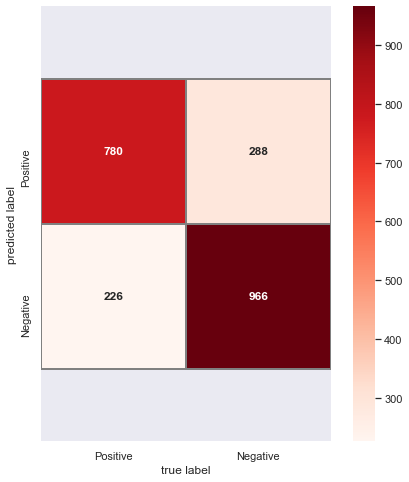

In [ ]:
#plotting a heatmap from the confusion matrix value above.
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(mat_3.T, square=True, linecolor='grey', linewidths=1, annot=True, 
            fmt='d', cbar=True, cmap='Reds', ax=ax, annot_kws={"fontsize":12, "weight":"bold"},
            xticklabels=y_test.unique(),
            yticklabels=y_test.unique())
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('true label')
plt.ylabel('predicted label');

We see from the above confusion matrix heat map of the balanced dataset , the errors around the diagnol has decreased and is not dark red in color.

# Comparison\Analysis

In [ ]:
import matplotlib.ticker as mtick

In [ ]:
#mnb_cr[mnb_cr.find('Negative')+len('Negative'):100].split()
#mnb_cr[mnb_cr.find('Neutral')+len('Neutral'):155].split()
#mnb_cr[mnb_cr.find('Positive')+len('Positive'):210].split()
mnb_cr[mnb_cr.find('accuracy')+35:261] # dataset using stopword on unbalanced dataset

'0.64'

In [ ]:
#svm_cr[svm_cr.find('Negative')+len('Negative'):100].split()
#svm_cr[svm_cr.find('Neutral')+len('Neutral'):155].split()
#svm_cr[svm_cr.find('Positive')+len('Positive'):210].split()
svm_cr[svm_cr.find('accuracy')+35:261]  # dataset using stopword on unbalanced dataset

'0.66'

In [ ]:
#B_svm_cr[B_svm_cr.find('Negative')+len('Negative'):100].split()
#B_svm_cr[B_svm_cr.find('Neutral')+len('Neutral'):155].split()
#B_svm_cr[B_svm_cr.find('Positive')+len('Positive'):210].split()
B_svm_cr[B_svm_cr.find('accuracy')+35:207] # dataset using stopWord on balanced dataset

'0.77'

In [ ]:
#B_mnb_cr[mnb_cr.find('Negative')+len('Negative'):100].split()
#B_mnb_cr[mnb_cr.find('Neutral')+len('Neutral'):155].split()
#B_mnb_cr[mnb_cr.find('Positive')+len('Positive'):210].split()
B_mnb_cr[B_mnb_cr.find('accuracy')+35:207] # dataset using stopWord on balanced dataset

'0.77'

In [ ]:
def accuracy_graph(cr1, cr2, cr3, cr4):
  acc_val = cr1[cr1.find('accuracy')+35:261]
  acc_val_2 = cr2[cr2.find('accuracy')+35:261]
  acc_val_3 = cr3[cr3.find('accuracy')+35:207]
  acc_val_4 = cr4[cr4.find('accuracy')+35:207]
  SVM =[float(acc_val_4)*100,float(acc_val_2)*100]
  MultinomialNB=[float(acc_val_3)*100,float(acc_val)*100]
  index = ['Balanced_Data','UnBalanced_Data']
  acc_pd = pd.DataFrame(data = {'SVM': SVM,'MultinomialNB':MultinomialNB},index=index)
  acc_pd
  ax = acc_pd.plot(kind='bar', ylim=(0,100), xlabel='dataSetType', ylabel = 'Accuracy', legend=True)
  ax.yaxis.set_major_formatter(mtick.PercentFormatter())
  ax.set_title('Accuracy Score of SVM/MNB')

**Visualization Comparison of two classifier across balanced and unbalanced dataset**

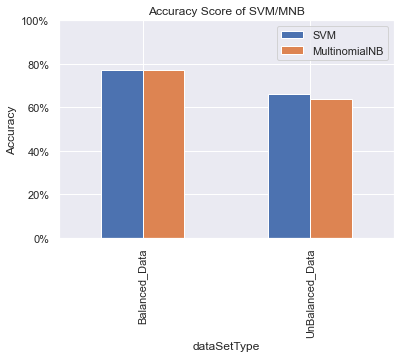

In [ ]:
accuracy_graph(mnb_cr, svm_cr, B_mnb_cr, B_svm_cr)

Comapring the SVM and MultinomialNB we see Accuracy score across balanced and unbalanced dataset differs which suggest we should have had balanced dataset to start with . We also see SVM edging over MultinomialNB in accuracy score which means we will go with SVM to design our model.

From the analysis of Kmean clustering we determined that the best clusters turned out to be from the Neutral sentiment segmentation, these results can be dependant on the fact that we had more data for Neutral values in order to examine results with less basis we should have more values for Positive and Negative sentences.

From the analysis of classification for unbalanced dataset with and without removing stopwords, we determined  accuracy did not changed  so we used dataset with stopwords cleaned. Secondly, we observed stemming of words dropped the accuracy drastically from our model. So did not use datasets with stemmed sentences. 
While analysing the dataset we saw, Neutral response had way more data than other response like Positive and negative. So we balanced the dataset by removing neutral.
Furthermore, from the analysis balanced and unbalanced dataset with stopword cleaned, we determined that balanced datsets gave overall high accuracy in comparison to unbalanced dataset. Lastly, from the analysis of two classifiers, we determined SVM is working better overall for a roman urdu dataset.

If we could get a balanced data set for Neutral response too then the model could have improved a lot with all three responses(Neutral,Positive,Negative).